## Python Libraries - Pandas - Pandas Basics

Pandas is a library built using NumPy specifically for data analysis. You'll be using Pandas heavily for data manipulation, visualisation, building machine learning models, etc. 

There are two main data structures in Pandas:
- Series
- Dataframes 

The default way to store data is dataframes, and thus manipulating dataframes quickly is probably the most important skill set for data analysis.

In [1]:
# import pandas, pd is an alias
import pandas as pd

### The Pandas Series 

A series is similar to a 1-D numpy array, and contains scalar values of the same type (numeric, character, datetime etc.). 
A dataframe is simply a table where each column is a pandas series.


In [2]:
# Creating a numeric pandas series
s = pd.Series([2, 4, 5, 6, 9])
print(s)
print(type(s))

0    2
1    4
2    5
3    6
4    9
dtype: int64
<class 'pandas.core.series.Series'>


In [3]:
# creating a series of type datetime
date_series = pd.date_range(start = '11-09-2017', end = '12-12-2017')
print(date_series)
print(type(date_series))

DatetimeIndex(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18', '2017-11-19', '2017-11-20',
               '2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24',
               '2017-11-25', '2017-11-26', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30', '2017-12-01', '2017-12-02',
               '2017-12-03', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-09', '2017-12-10',
               '2017-12-11', '2017-12-12'],
              dtype='datetime64[ns]', freq='D')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Note that each element in the Series has an index, and the index starts at 0 as usual.

### The Pandas Dataframe 

Dataframe is the most widely used data-structure in data analysis. It is a table with rows and columns, with rows having an index and columns having meaningful names.

There are various ways of creating dataframes, such as creating them from dictionaries, JSON objects, reading from txt, CSV files, etc. 

#### Creating dataframes from dictionaries

In [4]:
# Defining data to create lists for dictionary
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [False, True, True, True, False, False, False]

In [5]:
# Creating the dictionaries to store the entries as key-value pair.
cars_dict = {"cars_per_cap" : cars_per_cap, "country" : country, "drives_right" : drives_right }

# Create the dataframe 'cars'
cars = pd.DataFrame(cars_dict)

In [6]:
# print the created dataframe
cars

,cars_per_cap,country,drives_right
0,809,United States,False
1,731,Australia,True
2,588,Japan,True
3,18,India,True
4,200,Russia,False
5,70,Morocco,False
6,45,Egypt,False


In [7]:
pd.DataFrame(cars, columns = ['country', 'drives_right'])

,country,drives_right
0,United States,False
1,Australia,True
2,Japan,True
3,India,True
4,Russia,False
5,Morocco,False
6,Egypt,False


#### Importing CSV data files as pandas dataframes 

For the upcoming exercises, we will use a car dataset which holds the following information:

- Region Code 
- Country
- Coutry Code
- Car per capita
- Drives Right

In [8]:
# read the data from the csv file
cars = pd.read_csv(r"C:\Users\adity\Python Scripts\cars.csv", sep=',', header='infer')

# check the dataframe created
cars

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


As you can see from the dataframe above, the first row has been taken as the column header for the dataframe. Let's see how to prevent that.

In [9]:
# load the dataframe from the csv without any header
cars = pd.read_csv(r"C:\Users\adity\Python Scripts\cars.csv", sep=',', header=None)

# check the dataframe created
cars

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


Now, the columns have the labels as 0, 1, 2, etc. The top row is now considered as a part of the row entries.

## Python Libraries - Pandas - Rows and Columns

### Indices and Labels

#### Indices 

An important concept in pandas dataframes is that of *row indices*. By default, each row is assigned indices starting from 0, and are represented at the left side of the dataframe. 

Now, arbitrary numeric indices are difficult to read and work with. Thus, you may want to change the indices of the dataframe to something more meanigful.

Let's change the index to the second column which stores the country codes, so that you can select rows using the country code directly.

In [10]:
# load the data into a dataframe with no header and index column as the second column
cars = pd.read_csv(r"C:\Users\adity\Python Scripts\cars.csv", sep=',', header=None, index_col = 1)

# Check the created dataframe
cars

,0,2,3,4
1,,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


In [11]:
# Print the label of the index column
cars.index.name

1

In [12]:
# Remove the label of the index column
cars.index.name = ''

In [13]:
# Check the created dataframe
cars

,0,2,3,4
,,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


Having meaningful row labels as indices helps you to select (subset) dataframes easily. You will study selecting dataframes in the next section. Let's now try to change the column headers.

#### Column headers

In [14]:
# Print the column headers of the dataframe
cars.columns

Int64Index([0, 2, 3, 4], dtype='int64')

In [15]:
# Change the label of each column
cars.columns = ["Region_code", "Country", "Car_Per_Capita", "Drives"]

# Check the created dataframe
cars

,Region_code,Country,Car_Per_Capita,Drives
,,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


Without the labels, it will be very difficult to remember the information stored in the columns. Now you can easily make sense from the entries stored in the dataframe. Let's now try to define multiple indices in a dataframe.

#### Multi-indexing in Pandas

In [16]:
# Import the data from a csv file with multiple indices
cars = pd.read_csv(r"C:\Users\adity\Python Scripts\cars.csv", sep=',', header=None, index_col = [0,1])

# Check the created dataframe
cars

2      3      4
0     1                               
USCA  US   United States  809.0  False
ASPAC AUS      Australia  731.0   True
      JAP          Japan  588.0   True
      IN           India   18.0   True
      RU          Russia  200.0  False
LATAM MOR        Morocco   70.0  False
AFR   EG           Egypt   45.0  False
EUR   ENG        England    NaN   True

In [17]:
# Change the column names as above
cars.columns = ["Country", "Car_Per_Capita", "Drives"]

# Check the created dataframe
cars

Country  Car_Per_Capita  Drives
0     1                                         
USCA  US   United States           809.0   False
ASPAC AUS      Australia           731.0    True
      JAP          Japan           588.0    True
      IN           India            18.0    True
      RU          Russia           200.0   False
LATAM MOR        Morocco            70.0   False
AFR   EG           Egypt            45.0   False
EUR   ENG        England             NaN    True

In [18]:
# Print the index labels
print(cars.index.names)

[0, 1]


In [19]:
# Change the index labels: 0 - Region_code, 1 - Country_code
cars.index.names = ["Region_code", "Country_code"]

# Check the created dataframe
cars

Country  Car_Per_Capita  Drives
Region_code Country_code                                       
USCA        US            United States           809.0   False
ASPAC       AUS               Australia           731.0    True
            JAP                   Japan           588.0    True
            IN                    India            18.0    True
            RU                   Russia           200.0   False
LATAM       MOR                 Morocco            70.0   False
AFR         EG                    Egypt            45.0   False
EUR         ENG                 England             NaN    True

In [20]:
# Print the inforamtion of the index in the dataframe
cars.index

MultiIndex([( 'USCA',  'US'),
            ('ASPAC', 'AUS'),
            ('ASPAC', 'JAP'),
            ('ASPAC',  'IN'),
            ('ASPAC',  'RU'),
            ('LATAM', 'MOR'),
            (  'AFR',  'EG'),
            (  'EUR', 'ENG')],
           names=['Region_code', 'Country_code'])

Multi-indexing is very useful to establish a hierarchy in the entries. It helps to segregate data into different categories and makes it easier to analyse the data.

## Python Libraries - Pandas - Describing Data

You will be working with files of varied shape and sizes in the Pandas. One you have loaded the data in the dataframes, it is necessary that you check the created dataframe. However, it would be inefficieent to print the entire dataframe every time. Hence, you should learn how to print limited number of rows in a dataframe.

In [21]:
# import the required libraries
import pandas as pd

In [22]:
# Read data from the file 'sales.xlsx'
sales = pd.read_excel(r"C:\Users\adity\Python Scripts\sales.xlsx")

# Check the created dataframe
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


In [23]:
# Read the file with 'Region' as the index column
sales = pd.read_excel(r"C:\Users\adity\Python Scripts\sales.xlsx", index_col = 1)

# Check the created dataframe
sales

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Western Asia,Asia Pacific,382,-16766.90,124312.24
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98


In [24]:
# Printing first 5 entries from a dataframe
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [25]:
# Printing first 8 entries of a dataframe
sales.head(8)

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Western Asia,Asia Pacific,382,-16766.90,124312.24
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38


In [26]:
# Printing last 5 entries of the dataframe
sales.tail()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western US,USCA,490,44303.65,251991.83
Southern US,USCA,255,19991.83,148771.91
Eastern US,USCA,443,47462.04,264973.98
Central US,USCA,356,33697.43,170416.31
Canada,USCA,49,7246.62,26298.81


In [27]:
# Printing last 3 entries of the dataframe
sales.tail(3)

,Market,No_of_Orders,Profit,Sales
Region,,,,
Eastern US,USCA,443,47462.04,264973.98
Central US,USCA,356,33697.43,170416.31
Canada,USCA,49,7246.62,26298.81


#### Summarising the dataframes

A dataframe can have multiple columns and it is very important to understand what each column stores. You must be familiar with the column names, the data it stores, data type of each column, etc. Let's see different commands that will help you to do that.

In [28]:
# Summarising the dataframe structure
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, Western Africa to Canada
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Market        23 non-null     object 
 1   No_of_Orders  23 non-null     int64  
 2   Profit        23 non-null     float64
 3   Sales         23 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 920.0+ bytes


In [29]:
# Summary of data stored in each column
sales.describe()

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


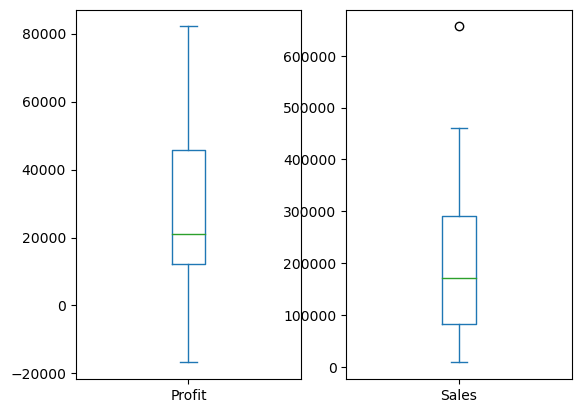

In [30]:
# Graphically summarising the spread of the columns - Profit and Sales
import matplotlib.pyplot as plt

sales[["Profit","Sales"]].plot(kind="box", subplots = True)
plt.show()

## Python Libraries - Pandas - Indexing and Slicing

In this section, you will:

* Select rows from a dataframe
* Select columns from a dataframe
* Select subsets of dataframes

### Selecting Rows

Selecting rows in dataframes is similar to the indexing you have seen in numpy arrays. The syntax ```df[start_index:end_index]``` will subset rows according to the start and end indices.

In [31]:
# Read data from the file 'sales.xlsx'
sales = pd.read_excel(r"C:\Users\adity\Python Scripts\sales.xlsx", index_col = [1])

# Check the created dataframe
# Remember - you should print limited number of entries to check the dataframe
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [32]:
# Selecting first 5 rows of the dataframe
sales[0:5]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [33]:
# Selecting all the even indices of the dataframe
sales[0::2]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
North Africa,Africa,182,21643.08,86698.89
Central Africa,Africa,103,15606.30,61689.99
Southern Asia,Asia Pacific,469,67998.76,351806.60
Oceania,Asia Pacific,646,54734.02,408002.98
Central Asia,Asia Pacific,37,-2649.76,8190.74
Southern Europe,Europe,338,18911.49,215703.93
Eastern Europe,Europe,241,25050.69,108258.93
Central America,LATAM,930,74679.54,461670.28


### Selecting Columns

There are two simple ways to select a single column from a dataframe:

-  ```df['column']``` or ```df.column``` return a series
-  ```df[['col_x', 'col_y']]``` returns a dataframe

In [34]:
# Select the column 'Profit' from the dataframe 'Sales'. Output must be in the form of a dataframe.
sliced_df = sales[["Profit"]]

In [35]:
# Check the type of the sliced data
type(sliced_df)

pandas.core.frame.DataFrame

In [36]:
# Select the column 'Profit' from the dataframe 'Sales'. Output must be in the form of a series.
sliced_series = sales["Profit"]

In [37]:
# Check the type of the sliced data
type(sliced_series)

pandas.core.series.Series

#### Selecting Multiple Columns 

You can select multiple columns by passing the list of column names inside the ```[]```: ```df[['column_1', 'column_2', 'column_n']]```.

In [38]:
# Selecting multiple columns from a dataframe
sales[["Profit","Sales"]].head()

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89
Eastern Africa,8013.04,44182.60
Central Africa,15606.30,61689.99


### Label and Position Based Indexing: ```df.loc``` and ```df.iloc```

You have seen some ways of selecting rows and columns from dataframes. Let's now see some other ways of indexing dataframes, which pandas recommends, since they are more explicit (and less ambiguous).

There are two main ways of indexing dataframes:
1. Label based indexing using ```df.loc```
2. Position based indexing using ```df.iloc```

Using both the methods, we will do the following indexing operations on a dataframe:
* Selecting single elements/cells
* Selecting single and multiple rows
* Selecting single and multiple columns
* Selecting multiple rows and columns

**Label-based Indexing**

In [39]:
# Select the row with index label as 'Canada'
sales.loc["Canada"]

Market              USCA
No_of_Orders          49
Profit           7246.62
Sales           26298.81
Name: Canada, dtype: object

In [40]:
# Select the row with index label as 'Canada' and 'Western Africa'
sales.loc[["Canada","Western Africa"]]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Canada,USCA,49,7246.62,26298.81
Western Africa,Africa,251,-12901.51,78476.06


In [41]:
# Select the row with index label as 'Canada' and 'Western Africa' along with the columns 'Profit' and 'Sales'
sales.loc[["Canada","Western Africa"], ["Profit","Sales"]]

,Profit,Sales
Region,,
Canada,7246.62,26298.81
Western Africa,-12901.51,78476.06


**Position-based Indexing**

In [42]:
# Select the top 5 rows and all the columns starting from second column
sales.iloc[0:5,2:]

,Profit,Sales
Region,,
Western Africa,-12901.51,78476.06
Southern Africa,11768.58,51319.50
North Africa,21643.08,86698.89
Eastern Africa,8013.04,44182.60
Central Africa,15606.30,61689.99


In [43]:
# Select all the entries with positive profit
sales[sales["Profit"]>0]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98
Eastern Asia,Asia Pacific,414,72805.10,315390.77
Western Europe,Europe,964,82091.27,656637.14


In [44]:
# Count the number of entries in the dataframe with positive profit
sales[sales["Profit"]>0].count()

Market          20
No_of_Orders    20
Profit          20
Sales           20
dtype: int64

In [45]:
# Select all the enries in Latin America and European market where Sales>250000
# sales.reset_index()
sales[(sales["Sales"]>250000) & (sales["Market"].isin(["LATAM", "Europe"]))]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


## Python Libraries - Pandas - Operations on Dataframes

In [46]:
# Checking the dataframe 'sales'
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [47]:
# Converting the Sales amount to Sales in thousand
sales.Sales = sales.Sales.floordiv(1000)

# Checking the dataframe 'sales'
sales

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0
Western Asia,Asia Pacific,382,-16766.90,124.0
Southern Asia,Asia Pacific,469,67998.76,351.0
Southeastern Asia,Asia Pacific,533,20948.84,329.0
Oceania,Asia Pacific,646,54734.02,408.0


In [48]:
# Renaming the column: 'Sales' to 'Sales in thousand'
sales.rename(columns = {"Sales":"Sales in thousand"})

,Market,No_of_Orders,Profit,Sales in thousand
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0
Western Asia,Asia Pacific,382,-16766.90,124.0
Southern Asia,Asia Pacific,469,67998.76,351.0
Southeastern Asia,Asia Pacific,533,20948.84,329.0
Oceania,Asia Pacific,646,54734.02,408.0


In [49]:
# Checking the dataframe 'sales'
sales

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0
Western Asia,Asia Pacific,382,-16766.90,124.0
Southern Asia,Asia Pacific,469,67998.76,351.0
Southeastern Asia,Asia Pacific,533,20948.84,329.0
Oceania,Asia Pacific,646,54734.02,408.0


In [50]:
# Help on rename function
help(pd.DataFrame.rename)

Help on function rename in module pandas.core.frame:

rename(self, mapper: 'Renamer | None' = None, *, index: 'Renamer | None' = None, columns: 'Renamer | None' = None, axis: 'Axis | None' = None, copy: 'bool | None' = None, inplace: 'bool' = False, level: 'Level' = None, errors: 'IgnoreRaise' = 'ignore') -> 'DataFrame | None'
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper : dict-like or function
        Dict-like or function transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    index : dict-like or function
        Alternative to specifying axis (``mapper, axis=0``
        is equivalent to ``index=mapper``).


In [51]:
# Role of inplace as an attribute
sales.rename(columns = {"Sales":"Sales in thousand"}, inplace = True)
sales

,Market,No_of_Orders,Profit,Sales in thousand
Region,,,,
Western Africa,Africa,251,-12901.51,78.0
Southern Africa,Africa,85,11768.58,51.0
North Africa,Africa,182,21643.08,86.0
Eastern Africa,Africa,110,8013.04,44.0
Central Africa,Africa,103,15606.30,61.0
Western Asia,Asia Pacific,382,-16766.90,124.0
Southern Asia,Asia Pacific,469,67998.76,351.0
Southeastern Asia,Asia Pacific,533,20948.84,329.0
Oceania,Asia Pacific,646,54734.02,408.0


In [52]:
import numpy as np

# Creating a new column: 'Positive Profit' using apply function and lambda operation
sales["Positive_Profit"] = sales.Profit.apply(lambda x:np.nan if x < 0 else x)
sales

,Market,No_of_Orders,Profit,Sales in thousand,Positive_Profit
Region,,,,,
Western Africa,Africa,251,-12901.51,78.0,NaN
Southern Africa,Africa,85,11768.58,51.0,11768.58
North Africa,Africa,182,21643.08,86.0,21643.08
Eastern Africa,Africa,110,8013.04,44.0,8013.04
Central Africa,Africa,103,15606.30,61.0,15606.30
Western Asia,Asia Pacific,382,-16766.90,124.0,NaN
Southern Asia,Asia Pacific,469,67998.76,351.0,67998.76
Southeastern Asia,Asia Pacific,533,20948.84,329.0,20948.84
Oceania,Asia Pacific,646,54734.02,408.0,54734.02


In [53]:
# Resetting the index
sales.reset_index(inplace=True)


# Setting hierarchical index: Market, Region
sales.set_index(["Market","Region"], inplace = True)

# Checking the dataframe
sales

No_of_Orders    Profit  Sales in thousand  \
Market       Region                                                         
Africa       Western Africa              251 -12901.51               78.0   
             Southern Africa              85  11768.58               51.0   
             North Africa                182  21643.08               86.0   
             Eastern Africa              110   8013.04               44.0   
             Central Africa              103  15606.30               61.0   
Asia Pacific Western Asia                382 -16766.90              124.0   
             Southern Asia               469  67998.76              351.0   
             Southeastern Asia           533  20948.84              329.0   
             Oceania                     646  54734.02              408.0   
             Eastern Asia                414  72805.10              315.0   
             Central Asia                 37  -2649.76                8.0   
Europe       Western Europe              964  82091.27              656.0   
             Southern Europe             338  18911.49              215.0   
             Northern Europe             367  43237.44              252.0   
             Eastern Europe              241  25050.69              108.0   
LATAM        South America               496  12377.59              210.0   
             Central America             930  74679.54              461.0   
             Caribbean                   288  13529.59              116.0   
USCA         Western US                  490  44303.65              251.0   
             Southern US                 255  19991.83              148.0   
             Eastern US                  443  47462.04              264.0   
             Central US                  356  33697.43              170.0   
             Canada                       49   7246.62               26.0   

                                Positive_Profit  
Market       Region                              
Africa       Western Africa                 NaN  
             Southern Africa           11768.58  
             North Africa              21643.08  
             Eastern Africa             8013.04  
             Central Africa            15606.30  
Asia Pacific Western Asia                   NaN  
             Southern Asia             67998.76  
             Southeastern Asia         20948.84  
             Oceania                   54734.02  
             Eastern Asia              72805.10  
             Central Asia                   NaN  
Europe       Western Europe            82091.27  
             Southern Europe           18911.49  
             Northern Europe           43237.44  
             Eastern Europe            25050.69  
LATAM        South America             12377.59  
             Central America           74679.54  
             Caribbean                 13529.59  
USCA         Western US                44303.65  
             Southern US               19991.83  
             Eastern US                47462.04  
             Central US                33697.43  
             Canada                     7246.62

In [54]:
# Fetching the rows under African market
sales.loc["Africa"]

,No_of_Orders,Profit,Sales in thousand,Positive_Profit
Region,,,,
Western Africa,251,-12901.51,78.0,NaN
Southern Africa,85,11768.58,51.0,11768.58
North Africa,182,21643.08,86.0,21643.08
Eastern Africa,110,8013.04,44.0,8013.04
Central Africa,103,15606.30,61.0,15606.30


In [55]:
# Fetching the rows under African and European market
sales.loc[["Africa",'Europe']]

No_of_Orders    Profit  Sales in thousand  \
Market Region                                                       
Africa Western Africa            251 -12901.51               78.0   
       Southern Africa            85  11768.58               51.0   
       North Africa              182  21643.08               86.0   
       Eastern Africa            110   8013.04               44.0   
       Central Africa            103  15606.30               61.0   
Europe Western Europe            964  82091.27              656.0   
       Southern Europe           338  18911.49              215.0   
       Northern Europe           367  43237.44              252.0   
       Eastern Europe            241  25050.69              108.0   

                        Positive_Profit  
Market Region                            
Africa Western Africa               NaN  
       Southern Africa         11768.58  
       North Africa            21643.08  
       Eastern Africa           8013.04  
       Central Africa          15606.30  
Europe Western Europe          82091.27  
       Southern Europe         18911.49  
       Northern Europe         43237.44  
       Eastern Europe          25050.69

In [56]:
# Fetching the rows under Western Europe in European market
sales.loc[[("Europe","Western Europe")]]

,,No_of_Orders,Profit,Sales in thousand,Positive_Profit
Market,Region,,,,
Europe,Western Europe,964,82091.27,656.0,82091.27


In [57]:
# Printing summary of the sales dataframe
sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_of_Orders       23 non-null     int64  
 1   Profit             23 non-null     float64
 2   Sales in thousand  23 non-null     float64
 3   Positive_Profit    20 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3+ KB


## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [58]:
# Loading libraries and file - sales.xlsx - with Market and Region as index

sales = pd.read_excel(r"C:\Users\adity\Python Scripts\sales.xlsx", index_col = [0,1])


In [59]:
# Checking the 'sales' dataframe 
sales

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

In [60]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").sum()


,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [61]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders","Sales"]].groupby("Market").sum()

,No_of_Orders,Sales
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [62]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [63]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
df = sales[["Profit"]].groupby("Market").mean()
df

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


[]

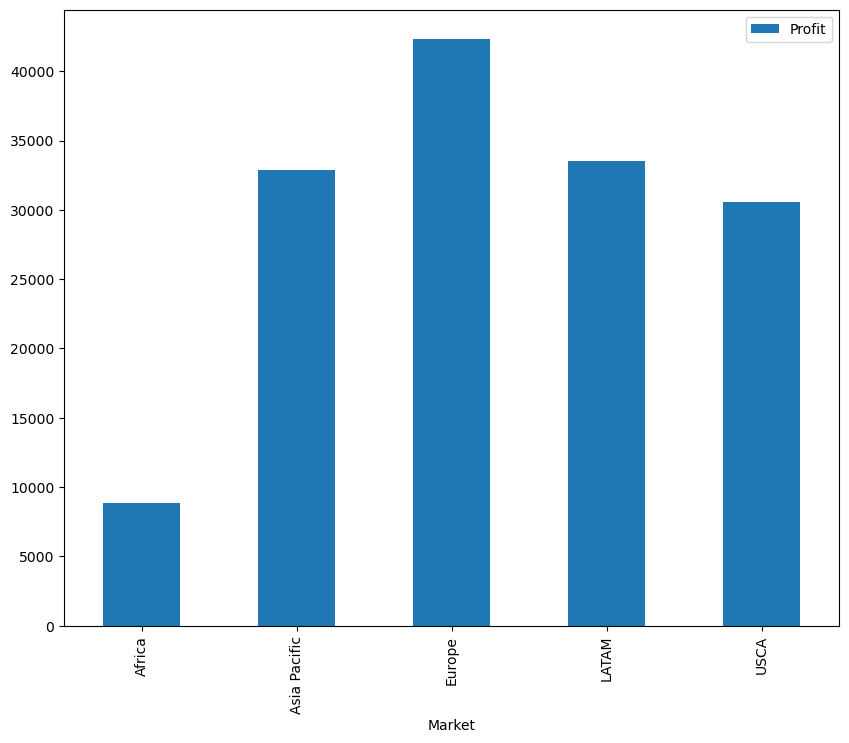

In [64]:
# Plotting a bar graph over 'df'
df.plot(kind='bar',figsize=(10,8))
plt.plot()

### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [65]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The

In [66]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [68]:
# Set the index of the dataframe as 'weekday'
users.set_index(["weekday"], inplace=True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


[]

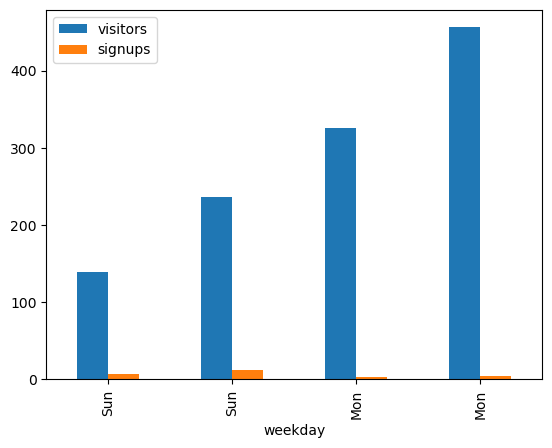

In [69]:
# plot a bar graph over the dataframe 'users'
users.plot(kind = "bar")
plt.plot()

In [70]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
visitors_pivot = users.pivot(columns = 'city',values= "visitors")


In [71]:
# Check the created pivot table
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


[]

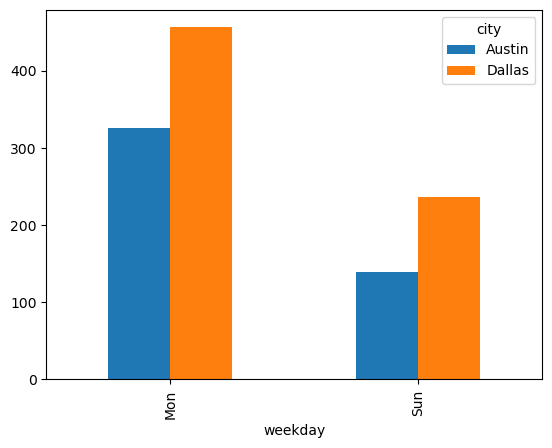

In [72]:
# Draw a bar graph over the created pivot
visitors_pivot.plot(kind="bar")
plt.plot()

In [73]:
# Create a pivot table with the columns as 'city' summarising all the variables
visitors_signups = users.pivot(columns = 'city')

In [74]:
# Check the created pivot table
visitors_signups

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

[]

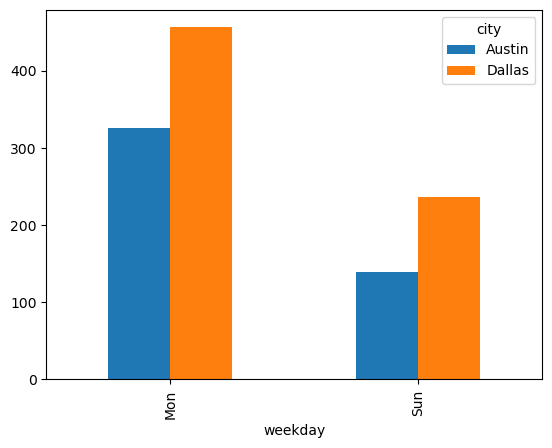

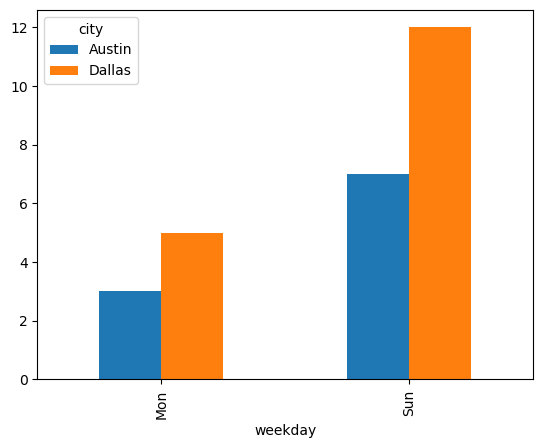

In [75]:
# Draw a bar graph over the created pivot for each variable
visitors_signups["visitors"].plot(kind="bar")
visitors_signups["signups"].plot(kind="bar")
plt.plot()

## Python Libraries - Pandas - Merge and Append

In this section, you will merge and concatenate multiple dataframes. Merging is one of the most common operations you will do, since data often comes in various files. 

### Merging

For merging, we have sales data across multiple sheets in an Excel file. We will now work with all these sheets and learn to:
* Merge multiple dataframes using common columns/keys using ```pd.merge()```

Let's first read all the data files.

In [76]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# read the sheets from file 'sales_returns.xlsx' into 2 different dataframes - orders and returns
orders = pd.read_excel(r"C:\Users\adity\Downloads\sales_returns.xlsx", sheet_name = "Orders")
returns = pd.read_excel(r"C:\Users\adity\Downloads\sales_returns.xlsx", sheet_name = "Returns")

In [78]:
# Check the shape of the dataframe 'orders'
orders.shape

(25728, 4)

In [79]:
# Check the shape of the dataframe 'returns'
returns.shape

(1079, 2)

In [80]:
# check the dataframe 'orders' and 'returns'
print(orders.info())
print(returns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25728 entries, 0 to 25727
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  25728 non-null  object 
 1   Market    25728 non-null  object 
 2   Profit    25728 non-null  float64
 3   Sales     25728 non-null  float64
dtypes: float64(2), object(2)
memory usage: 804.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  1079 non-null   object
 1   Order ID  1079 non-null   object
dtypes: object(2)
memory usage: 17.0+ KB
None


In [81]:
# Create a dataframe 'return_orders' by merging the two dataframes on Order_ID
return_orders = orders.merge(returns, on = "Order ID")

# Check the created dataframe
return_orders

,Order ID,Market,Profit,Sales,Returned
0,AG-2013-PO88653-41634,Africa,191.2500,1932.240,Yes
1,AG-2014-CM21603-41755,Africa,10.3200,43.050,Yes
2,AG-2014-CP20853-41889,Africa,14.1000,84.720,Yes
3,AG-2014-RD95853-41712,Africa,21.0300,64.380,Yes
4,AO-2013-JE57454-41544,Africa,106.5900,499.230,Yes
...,...,...,...,...,...
1074,US-2015-ME17320140-42322,USCA,-24.7086,9.324,Yes
1075,US-2015-PN18775140-42339,USCA,8.9970,71.976,Yes
1076,US-2015-RL19615140-42147,USCA,18.8328,49.560,Yes
1077,US-2015-SC20050140-42278,USCA,-17.4690,11.646,Yes


In [82]:
# Check the shape of the new dataframe
return_orders.shape

(1079, 5)

In [83]:
# try to use the 'left' method to join two dataframes
return_orders = orders.merge(returns, on = "Order ID", how = "left")

# Check the created dataframe
return_orders

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.7600,298.680,NaN
1,AG-2012-AC4203-40915,Africa,14.5800,91.380,NaN
2,AG-2012-AH2103-41133,Africa,11.0400,276.960,NaN
3,AG-2012-AJ7803-40978,Africa,7.1700,35.970,NaN
4,AG-2012-AS2853-41235,Africa,15.3600,54.900,NaN
...,...,...,...,...,...
25723,US-2015-VM21835140-42252,USCA,6.9654,14.820,NaN
25724,US-2015-WB21850140-42349,USCA,12.8767,91.193,NaN
25725,US-2015-XP21865140-42287,USCA,16.5440,35.200,NaN
25726,US-2015-XP21865140-42323,USCA,-22.7882,212.992,NaN


In [84]:
# Check the orders where orders were returned
return_orders[return_orders["Returned"]=="Yes"]

,Order ID,Market,Profit,Sales,Returned
35,AG-2013-PO88653-41634,Africa,191.2500,1932.240,Yes
44,AG-2014-CM21603-41755,Africa,10.3200,43.050,Yes
45,AG-2014-CP20853-41889,Africa,14.1000,84.720,Yes
56,AG-2014-RD95853-41712,Africa,21.0300,64.380,Yes
111,AO-2013-JE57454-41544,Africa,106.5900,499.230,Yes
...,...,...,...,...,...
25622,US-2015-ME17320140-42322,USCA,-24.7086,9.324,Yes
25659,US-2015-PN18775140-42339,USCA,8.9970,71.976,Yes
25675,US-2015-RL19615140-42147,USCA,18.8328,49.560,Yes
25685,US-2015-SC20050140-42278,USCA,-17.4690,11.646,Yes


In [85]:
# Print the dataframe summary using the info() command
return_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25728 entries, 0 to 25727
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  25728 non-null  object 
 1   Market    25728 non-null  object 
 2   Profit    25728 non-null  float64
 3   Sales     25728 non-null  float64
 4   Returned  1079 non-null   object 
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [86]:
# Change the data type of the column 'Returned' 
return_orders["Returned"]=return_orders["Returned"].astype("str")

In [87]:
# Check the dataframe after modification
return_orders

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.7600,298.680,nan
1,AG-2012-AC4203-40915,Africa,14.5800,91.380,nan
2,AG-2012-AH2103-41133,Africa,11.0400,276.960,nan
3,AG-2012-AJ7803-40978,Africa,7.1700,35.970,nan
4,AG-2012-AS2853-41235,Africa,15.3600,54.900,nan
...,...,...,...,...,...
25723,US-2015-VM21835140-42252,USCA,6.9654,14.820,nan
25724,US-2015-WB21850140-42349,USCA,12.8767,91.193,nan
25725,US-2015-XP21865140-42287,USCA,16.5440,35.200,nan
25726,US-2015-XP21865140-42323,USCA,-22.7882,212.992,nan


In [88]:
# Replace the 'nan' value with 'No' in the column 'Returned'
return_orders["Returned"]=return_orders["Returned"].apply(lambda x: "No" if x == "nan" else x)

# Check the dataframe after modification
return_orders

,Order ID,Market,Profit,Sales,Returned
0,AG-2012-AA6453-41020,Africa,53.7600,298.680,No
1,AG-2012-AC4203-40915,Africa,14.5800,91.380,No
2,AG-2012-AH2103-41133,Africa,11.0400,276.960,No
3,AG-2012-AJ7803-40978,Africa,7.1700,35.970,No
4,AG-2012-AS2853-41235,Africa,15.3600,54.900,No
...,...,...,...,...,...
25723,US-2015-VM21835140-42252,USCA,6.9654,14.820,No
25724,US-2015-WB21850140-42349,USCA,12.8767,91.193,No
25725,US-2015-XP21865140-42287,USCA,16.5440,35.200,No
25726,US-2015-XP21865140-42323,USCA,-22.7882,212.992,No


### Append / Concatenate

Concatenation is much more straightforward than merging. It is used when you have dataframes having the same columns and want to append them (pile one on top of the other), or having the same rows and want to append them side-by-side.


In [89]:
# Import the required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

**Appending rows in a dataframe**

In [90]:
# Dataframes having the same columns

df1 = pd.DataFrame({'Name': ['Aman', 'Joy', 'Rashmi', 'Saif'],
                    'Age' : ['34', '31', '22', '33'], 
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Akhil', 'Asha', 'Preeti'],
                    'Age' : ['31', '22', '23'], 
                    'Gender': ['M', 'F', 'F']}
                  )

In [91]:
# Append the rows of df2 in df1
df1.append(df2)

,Name,Age,Gender
0,Aman,34,M
1,Joy,31,M
2,Rashmi,22,F
3,Saif,33,M
0,Akhil,31,M
1,Asha,22,F
2,Preeti,23,F


**Appending columns in a dataframe**

In [92]:
# Another dataframe with same number of rows as df1
df3 = pd.DataFrame({'School': ['RK Public', 'JSP', 'Carmel Convent', 'St. Paul'],
                    'Graduation Marks': ['84', '89', '76', '91']}
                  )

In [93]:
# Concatenating the dataframes: df1 and df3
pd.concat([df1,df3])

,Name,Age,Gender,School,Graduation Marks
0,Aman,34,M,NaN,NaN
1,Joy,31,M,NaN,NaN
2,Rashmi,22,F,NaN,NaN
3,Saif,33,M,NaN,NaN
0,NaN,NaN,NaN,RK Public,84
1,NaN,NaN,NaN,JSP,89
2,NaN,NaN,NaN,Carmel Convent,76
3,NaN,NaN,NaN,St. Paul,91


In [94]:
# Concatenating the dataframes across column: df1 and df3
pd.concat([df1,df3], axis = 1)

,Name,Age,Gender,School,Graduation Marks
0,Aman,34,M,RK Public,84
1,Joy,31,M,JSP,89
2,Rashmi,22,F,Carmel Convent,76
3,Saif,33,M,St. Paul,91


## Python Libraries - Pandas - Time Series

In [95]:
# read the dataset 'weather_data.csv'
weather = pd.read_csv(r"C:\Users\adity\Python Scripts\weather_data.csv")

In [96]:
# Check the created dataframe
weather

,Temperature,DewPoint,Pressure,Date_Time
0,46.2,37.5,1,20100101 00:00
1,44.6,37.1,1,20100101 01:00
2,44.1,36.9,1,20100101 02:00
3,43.8,36.9,1,20100101 03:00
4,43.5,36.8,1,20100101 04:00
...,...,...,...,...
8754,51.1,38.1,1,20101231 19:00
8755,49.0,37.9,1,20101231 20:00
8756,47.9,37.9,1,20101231 21:00
8757,46.9,37.9,1,20101231 22:00


In [97]:
# Read the dataframe with Date_Time variable in the correct form
weather = pd.read_csv(r"C:\Users\adity\Python Scripts\weather_data.csv", parse_dates = ["Date_Time"])

# Check the created dataframe
weather

,Temperature,DewPoint,Pressure,Date_Time
0,46.2,37.5,1,2010-01-01 00:00:00
1,44.6,37.1,1,2010-01-01 01:00:00
2,44.1,36.9,1,2010-01-01 02:00:00
3,43.8,36.9,1,2010-01-01 03:00:00
4,43.5,36.8,1,2010-01-01 04:00:00
...,...,...,...,...
8754,51.1,38.1,1,2010-12-31 19:00:00
8755,49.0,37.9,1,2010-12-31 20:00:00
8756,47.9,37.9,1,2010-12-31 21:00:00
8757,46.9,37.9,1,2010-12-31 22:00:00


In [98]:
# Read the dataframe with Date_Time variable in the correct form and as Index
weather.set_index(["Date_Time"], inplace=True)

# Check the created dataframe
weather

,Temperature,DewPoint,Pressure
Date_Time,,,
2010-01-01 00:00:00,46.2,37.5,1
2010-01-01 01:00:00,44.6,37.1,1
2010-01-01 02:00:00,44.1,36.9,1
2010-01-01 03:00:00,43.8,36.9,1
2010-01-01 04:00:00,43.5,36.8,1
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1
2010-12-31 20:00:00,49.0,37.9,1
2010-12-31 21:00:00,47.9,37.9,1


In [99]:
# Delete the index label
weather.index.name=""

In [100]:
weather


,Temperature,DewPoint,Pressure
,,,
2010-01-01 00:00:00,46.2,37.5,1
2010-01-01 01:00:00,44.6,37.1,1
2010-01-01 02:00:00,44.1,36.9,1
2010-01-01 03:00:00,43.8,36.9,1
2010-01-01 04:00:00,43.5,36.8,1
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1
2010-12-31 20:00:00,49.0,37.9,1
2010-12-31 21:00:00,47.9,37.9,1


In [101]:
# Fetch the entries for the date: 'February 5, 2010'
weather.loc["2010-02-05"]

,Temperature,DewPoint,Pressure
,,,
2010-02-05 00:00:00,48.2,40.9,1
2010-02-05 01:00:00,47.2,41.0,1
2010-02-05 02:00:00,46.5,40.6,1
2010-02-05 03:00:00,45.9,40.4,1
2010-02-05 04:00:00,45.4,39.9,1
2010-02-05 05:00:00,44.9,39.5,1
2010-02-05 06:00:00,45.3,39.6,1
2010-02-05 07:00:00,44.3,39.1,1
2010-02-05 08:00:00,44.8,39.5,1


In [102]:
# Slice all the entries between 9 AM and 10 PM on 11th October
weather.loc["2010-10-11 09:00:00":"2010-10-11 22:00:00"]

,Temperature,DewPoint,Pressure
,,,
2010-10-11 09:00:00,69.8,60.7,1
2010-10-11 10:00:00,73.5,60.7,1
2010-10-11 11:00:00,76.4,60.2,1
2010-10-11 12:00:00,78.5,59.4,1
2010-10-11 13:00:00,80.3,59.1,1
2010-10-11 14:00:00,81.5,58.7,1
2010-10-11 15:00:00,82.0,58.5,1
2010-10-11 16:00:00,81.7,58.2,1
2010-10-11 17:00:00,80.6,58.2,1


In [103]:
# Slice all the entries between 15th and 31st December
weather.loc["2010-12-15":"2010-12-31"]

,Temperature,DewPoint,Pressure
,,,
2010-12-15 00:00:00,48.0,40.5,1
2010-12-15 01:00:00,47.2,40.3,1
2010-12-15 02:00:00,46.5,40.0,1
2010-12-15 03:00:00,46.0,39.7,1
2010-12-15 04:00:00,45.6,39.5,1
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1
2010-12-31 20:00:00,49.0,37.9,1
2010-12-31 21:00:00,47.9,37.9,1


[]

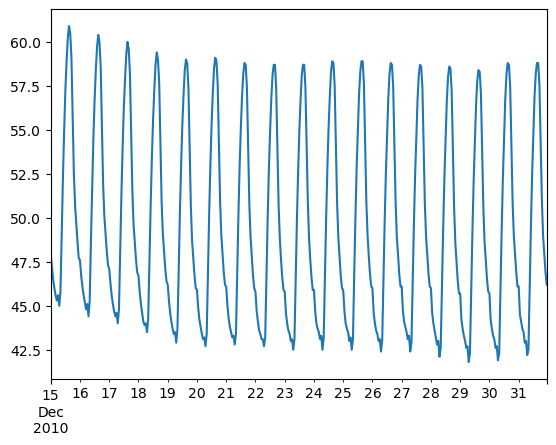

In [104]:
# Plot the trend of the data for the entries obtained above

dec = weather.loc["2010-12-15":"2010-12-31"]

dec["Temperature"].plot(kind = "line")
plt.plot()

## Practice Exercise 1

This is the first exercise for Pandas. You are provided with 2 fictional dataframes based on Indian Premier League (IPL). The first dataframe contains the data for all the teams who participated in the year 2018. In the second dataframe, the data is for the year 2017.

In [105]:
# import the required libraries - numpy and pandas
import numpy as np
import pandas as pd

#### Data Dictionary

-  Team: Team name
-  Matches: Total number of matches played
-  Won: Number of matches won
-  Lost: Number of matches lost
-  Tied': Number of matches tied
-  N/R: Number of matches with no result
-  NRR: Net run rate (Rate of scoring the runs)
-  For: Sum of runs scored by the team against other teams
-  Against: Sum of runs scored by the opposite playing teams

In [106]:
# ipl18 contains the data for 2018
ipl18 = pd.DataFrame({'Team': ['SRH', 'CSK', 'KKR', 'RR', 'MI', 'RCB', 'KXIP', 'DD'],
                         'Matches': [14, 14, 14, 14, 14, 14, 14, 14],
                         'Won': [9, 9, 8, 7, 6, 6, 6, 5],
                         'Lost': [5, 5, 6, 7, 8, 8, 8, 9],
                         'Tied': [0, 0, 0, 0, 0, 0, 0, 0],
                         'N/R': [0, 0, 0, 0, 0, 0, 0, 0],
                         'NRR': [0.284, 0.253, -0.070, -0.250, 0.317, 0.129, -0.502, -0.222],
                         'For': [2230, 2488, 2363, 2130, 2380, 2322, 2210, 2297],
                         'Against': [2193, 2433, 2425, 2141, 2282, 2383, 2259, 2304]},
                         index = range(1,9)
                    )

In [107]:
# print the entire dataframe to check the entries
ipl18

,Team,Matches,Won,Lost,Tied,N/R,NRR,For,Against
1,SRH,14,9,5,0,0,0.284,2230,2193
2,CSK,14,9,5,0,0,0.253,2488,2433
3,KKR,14,8,6,0,0,-0.070,2363,2425
4,RR,14,7,7,0,0,-0.250,2130,2141
5,MI,14,6,8,0,0,0.317,2380,2282
6,RCB,14,6,8,0,0,0.129,2322,2383
7,KXIP,14,6,8,0,0,-0.502,2210,2259
8,DD,14,5,9,0,0,-0.222,2297,2304


In [108]:
# ipl17 contains the data for 2017
ipl17 = pd.DataFrame({'Team': ['MI', 'RPS', 'SRH', 'KKR', 'KXIP', 'DD', 'GL', 'RCB'],
                         'Matches': [14, 14, 14, 14, 14, 14, 14, 14],
                         'Won': [10, 9, 8, 8, 7, 6, 4, 3],
                         'Lost': [4, 5, 5, 6, 7, 8, 10, 10],
                         'Tied': [0, 0, 0, 0, 0, 0, 0, 0],
                         'N/R': [0, 0, 1, 0, 0, 0, 0, 1],
                         'NRR': [0.784, 0.176, 0.469, 0.641, 0.123, -0.512, -0.412, -1.299],
                         'For': [2407, 2180, 2221, 2329, 2207, 2219, 2406, 1845],
                         'Against': [2242, 2165, 2118, 2300, 2229, 2255, 2472, 2033]},
                         index = range(1,9)
                    )

In [109]:
# print the entire dataframe to check the entries
ipl17

,Team,Matches,Won,Lost,Tied,N/R,NRR,For,Against
1,MI,14,10,4,0,0,0.784,2407,2242
2,RPS,14,9,5,0,0,0.176,2180,2165
3,SRH,14,8,5,0,1,0.469,2221,2118
4,KKR,14,8,6,0,0,0.641,2329,2300
5,KXIP,14,7,7,0,0,0.123,2207,2229
6,DD,14,6,8,0,0,-0.512,2219,2255
7,GL,14,4,10,0,0,-0.412,2406,2472
8,RCB,14,3,10,0,1,-1.299,1845,2033


 As a part of this exercise, solve the questions that are provided below. There are few tasks that you will have to perform to be able to answer the questions.

**Task 1**

You have to create a new column '*Points*' in both the dataframes that stores the total points scored by each team. The following scoring system is used to calculate the points of a team:
-  Win: 2 points
-  Loss: 0 points
-  Tie: 1 point
-  N/R (no result): 1 point

In [110]:
# Type your code here
ipl17["Points"] = ipl17["Won"]*2+ipl17["Tied"]*1+ipl17["N/R"]*1
ipl18["Points"] = ipl18["Won"]*2+ipl18["Tied"]*1+ipl18["N/R"]*1

#### Q1: Extract Top Four Teams
Which of the following commands can you use to extract the top 4 teams in the dataset ‘ipl18’ with just the ‘Team’ and ‘Points’ column?


-  ipl18.loc [0:3, [‘Team’, ‘Points’]]
-  ipl18.loc [1:4, [‘Team’, ‘Points’]]
-  ipl18.loc [0:4, [‘Team’, ‘Points’]]
-  ipl18.loc [1:3, [‘Team’, ‘Points’]]

In [111]:
# Type your code here
ipl18.loc [1:4, ['Team', 'Points']]

,Team,Points
1,SRH,18
2,CSK,18
3,KKR,16
4,RR,14


#### Q2: Filtering based on conditions
Suppose in ‘ipl18’, you want to filter out the teams that have an NRR greater than zero, and for which the ‘For’ score exceeds the ‘Against’ score, i.e. both the conditions should be satisfied. Which teams will be left after you perform the above filtration? (Run the commands on the Python Notebook provided, rather than performing a manual calculation)

-  CSK, MI
-  SRH, CSK, MI
-  SRH, CSK, RCB
-  SRH, CSK, MI, RCB

In [112]:
# Type your code here
ipl18.loc[(ipl18.NRR > 0) & (ipl18.For > ipl18.Against)]

,Team,Matches,Won,Lost,Tied,N/R,NRR,For,Against,Points
1,SRH,14,9,5,0,0,0.284,2230,2193,18
2,CSK,14,9,5,0,0,0.253,2488,2433,18
5,MI,14,6,8,0,0,0.317,2380,2282,12


#### Q3: Operations on multiple dataframes
If all the stats are taken for both ‘ipl17’ and ‘ipl18’, which team with its total points greater than 25 will have the highest win percentage?

-  KKR
-  CSK
-  RPS
-  SRH

In [113]:
# Type your code here
ipl = ipl18.append(ipl17)
ipl_points = ipl.groupby("Team")[["Matches","Won","Points"]].sum()
ipl_points = ipl_points[ipl_points["Points"]>25]
ipl_points["Perc"]=ipl_points["Won"]/ipl_points["Matches"]
ipl_points[ipl_points["Perc"]==max(ipl_points["Perc"])]

,Matches,Won,Points,Perc
Team,,,,
SRH,28,17,35,0.607143


## Practice Exercise 2

In this assignment, you will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. You will have to download a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections, and submit the code.

#### Some tips before starting the assignment

1. Identify the task to be performed correctly, and only then proceed to write the required code. Don’t perform any incorrect analysis or look for information that isn’t required for the assignment.
2. In some cases, the variable names have already been assigned, and you just need to write code against them. In other cases, the names to be given are mentioned in the instructions. We strongly advise you to use the mentioned names only.
3. Always keep inspecting your data frame after you have performed a particular set of operations.
4. There are some checkpoints given in the IPython notebook provided. They're just useful pieces of information you can use to check if the result you have obtained after performing a particular task is correct or not.
5. Note that you will be asked to refer to documentation for solving some of the questions. That is done on purpose for you to learn new commands and also how to use the documentation.

In [114]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [115]:
# Write your code for importing the csv file here
movies = pd.read_csv(r"C:\Users\adity\Python Scripts\Movies.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3849,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
3850,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
3851,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [116]:
# Write your code for inspection here
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3851 non-null   object 
 1   director_name              3853 non-null   object 
 2   num_critic_for_reviews     3852 non-null   float64
 3   duration                   3852 non-null   float64
 4   director_facebook_likes    3853 non-null   float64
 5   actor_3_facebook_likes     3847 non-null   float64
 6   actor_2_name               3852 non-null   object 
 7   actor_1_facebook_likes     3853 non-null   float64
 8   gross                      3853 non-null   float64
 9   genres                     3853 non-null   object 
 10  actor_1_name               3853 non-null   object 
 11  movie_title                3853 non-null   object 
 12  num_voted_users            3853 non-null   int64  
 13  cast_total_facebook_likes  3853 non-null   int64

#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>
-  <font color='red'>(3821, 26)</font>
-  <font color='red'>(3879, 28)</font>
-  <font color='red'>(3853, 28)</font>
-  <font color='red'>(3866, 26)</font>

In [117]:
movies.shape

(3853, 28)

#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

-  <font color='red'>3</font>
-  <font color='red'>6</font>
-  <font color='red'>9</font>
-  <font color='red'>12</font>

In [118]:
print((movies.isnull().sum()>0).sum())

12


### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [119]:
# Check the 'drop' function in the Pandas library - dataframe.drop(list_of_unnecessary_columns, axis = )
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations

l1 = [
"color",
"director_facebook_likes",
"actor_1_facebook_likes",
"actor_2_facebook_likes",
"actor_3_facebook_likes",
"actor_2_name",
"cast_total_facebook_likes",
"actor_3_name",
"duration",
"facenumber_in_poster",
"content_rating",
"country",
"movie_imdb_link",
"aspect_ratio",
"plot_keywords"]

movies1 = movies.drop(l1, axis = 1)




In [120]:
movies1

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
3849,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
3850,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
3851,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>
-  <font color='red'>10</font>
-  <font color='red'>13</font>
-  <font color='red'>15</font>
-  <font color='red'>17</font>

In [121]:
print(len(movies1.columns))
movies1.shape

13


(3853, 13)

In [122]:
# Columns with null values
print((movies1.isnull().sum()>0).sum())

2


**Subtask 2.2: Inspect Null values**

As you have seen above, there are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [123]:
# Write you code here
movies1.isnull().mean() 

director_name             0.000000
num_critic_for_reviews    0.000260
gross                     0.000000
genres                    0.000000
actor_1_name              0.000000
movie_title               0.000000
num_voted_users           0.000000
num_user_for_reviews      0.000000
language                  0.000779
budget                    0.000000
title_year                0.000000
imdb_score                0.000000
movie_facebook_likes      0.000000
dtype: float64

In [124]:
round(100*(movies1.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

In [125]:
movies1.columns[movies1.isnull().mean() == movies1.isnull().mean().max()][0]

'language'

**Subtask 2.3: Fill NaN values**

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [126]:
# Write your code for filling the NaN values in the 'language' column here
movies1.loc[pd.isnull(movies1['language']), ['language']] = 'English'

In [127]:
movies1

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
3849,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
3850,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
3851,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>
-  <font color='red'>3670</font>
-  <font color='red'>3674</font>
-  <font color='red'>3668</font>
-  <font color='red'>3672</font>

In [128]:
(movies.language == 'English').sum()

3671

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [129]:
# Write your code for unit conversion here
movies1["budget"] = movies1["budget"]/1000000
movies1["gross"] = movies1["gross"]/1000000

In [130]:
movies1

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000
4,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000
3849,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74
3850,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0
3851,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413


**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [131]:
# Write your code for creating the profit column here
movies1['profit'] = movies1['gross'] - movies1['budget']

In [132]:
# Write your code for sorting the dataframe here
movies1.sort_values(by = 'profit', ascending = False).head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
16,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
482,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
230,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
419,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


In [133]:
# Write your code to get the top 10 profiting movies here
top10 = movies1.sort_values(by = 'profit', ascending = False).head(10)

In [134]:
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
16,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
482,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
230,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
419,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>
-  <font color='red'>E.T. the Extra-Terrestrial</font>
-  <font color='red'>The Avengers</font>
-  <font color='red'>The Dark Knight</font>
-  <font color='red'>Titanic</font>

In [135]:
top10.head()


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459


**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [136]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250 = movies1.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)
IMDb_Top_250.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1795,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.341469,1
3016,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.821952,2
2543,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.300000,3
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061,4
325,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.019252,5


#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>
-  <font color='red'>7.5 to 8</font>
-  <font color='red'>8 to 8.5</font>
-  <font color='red'>8.5 to 9</font>
-  <font color='red'>9 to 9.5</font>
-  <font color='red'>9.5 to 10</font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

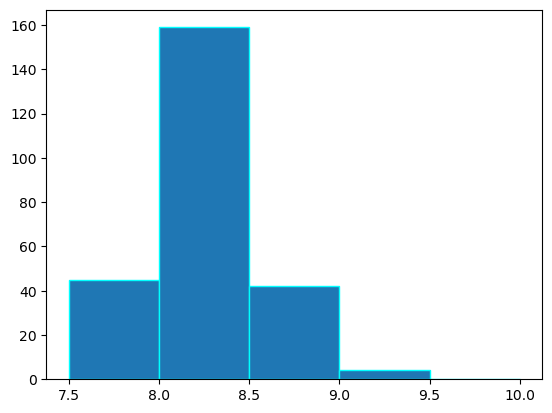

In [137]:
import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()

**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [138]:
# Write your code for creating three new dataframes here
# Include all movies in which Meryl_Streep is the lead
Meryl_Streep = movies1.loc[movies1.actor_1_name == 'Meryl Streep']
Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
392,Nancy Meyers,187.0,112.703470,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,27.703470
1038,Curtis Hanson,42.0,46.815748,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,1.815748
1132,Nora Ephron,252.0,94.125426,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,54.125426
1322,David Frankel,208.0,124.732962,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,89.732962
1390,Robert Redford,227.0,14.998070,Drama|Thriller|War,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,-20.001930
1471,Sydney Pollack,66.0,87.100000,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,56.100000
1514,David Frankel,234.0,63.536011,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,33.536011
1563,Carl Franklin,64.0,23.209440,Drama,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,-6.790560
1784,Stephen Daldry,174.0,41.597830,Drama|Romance,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,16.597830
2500,Phyllida Lloyd,331.0,29.959436,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,16.959436


In [139]:
# Include all movies in which Leo_Caprio is the lead
Leo_Caprio = movies1.loc[movies1.actor_1_name == 'Leonardo DiCaprio']

In [140]:
# Include all movies in which Brad_Pitt is the lead
Brad_Pitt = movies1.loc[movies1.actor_1_name == 'Brad Pitt']

In [141]:
# Write your code for combining the three dataframes here
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])

In [142]:
# Write your code for grouping the combined dataframe here
Combined_by_segment = Combined.groupby('actor_1_name')

#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [143]:
# Write the code for finding the mean of critic reviews and audience reviews here
Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [144]:
Combined_by_segment['num_critic_for_reviews'].mean()

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

## Graded Questions

In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv(r"C:\Users\adity\Python Scripts\Basic excels\MegaMart_sales.csv")

In [3]:
df_new = pd.read_csv(r"C:\Users\adity\Python Scripts\Basic excels\MegaMart_newsales.csv")

#### Combining two data frames
Question 1: Some of the orders are stored in another csv file named `megamart_new sales`. Read the csv file, store it in a data frame and add it to the `megamart_sales` data frame. Find the total sales value of the category 'Office Supplies'  after combining the dataframes

    a)7970
    b)6964
    c)7494
    d)6076

In [4]:
#your code here
df=pd.concat([df,df_new],axis=0,ignore_index=True) 

df.groupby(by='Category').Sales.sum()

Category
Furniture          2460
Office Supplies    7970
Technology         8588
Name: Sales, dtype: int64

#### Dropping duplicates
Question 2: There are some duplicate rows in the data frame. Drop these rows and calculate the total sales value of the category Office Supplies.

    a)7156
    b)6496
    c)6964
    d)6023

In [5]:
#your code here

df.drop_duplicates(subset=None,keep='first',inplace = True)
df.groupby(by='Category').Sales.sum()

Category
Furniture          2460
Office Supplies    6964
Technology         7494
Name: Sales, dtype: int64

#### Best category-sub category 
Question 3: Find the most profitable category and sub category combination based on the net profit.


    a)Furniture-Bookcases
    b)Office supplies-Appliances
    c)Office supplies-Storage
    d)Technology-Phones

In [6]:
#your code here

df.groupby(by=['Category','Sub-Category']).Profit.sum()

Category         Sub-Category
Furniture        Bookcases        308
                 Chairs           -49
                 Furnishings       74
Office Supplies  Appliances       229
                 Art              275
                 Binders          156
                 Envelopes         35
                 Fasteners         10
                 Labels            30
                 Paper             15
                 Storage          192
                 Supplies         103
Technology       Accessories      215
                 Copiers            0
                 Machines         168
                 Phones          1618
Name: Profit, dtype: int64

#### Invalid order IDs
Question 4: How many invalid order IDs are there in the data frame. An order id is of the form AZ-2011-Y where Y represents a whole number. A Order ID is said to be valid only if Y consists of 7 digits. Find the number of invalid order order IDs in the data frame.
    
    a)6
    b)7
    c)8
    d)9


In [7]:
#your code here

df['Order no']=df['Order ID'].str.split('-')

df['Order no']=df['Order no'].apply(lambda x: x[2])

df['no_of_digits']=df['Order no'].apply(lambda x: len(x))

df['no_of_digits'].value_counts()

7    54
6     7
Name: no_of_digits, dtype: int64

#### Occurence of furniture in top 25 sales
Question 5: Find the top 25 orders based on sales value and find the number of orders which belong to furniture category.

    a)2
    b)3
    c)4
    d)5 

In [8]:
#your code here

df2=df.sort_values(by='Sales', ascending=False)
df2=df2.iloc[:25,]

df2['Category'].value_counts()

Office Supplies    11
Technology          9
Furniture           5
Name: Category, dtype: int64

#### And operation
Question 6: Among the orders with sales>250 and profit>50, find the product name of the fourth highest order based on sales value.

    a)Motorola Headset, with Caller ID
    b)Panasonic Printer, Durable	
    c)Hoover Microwave, Red	
    d)Fellowes Lockers, Industrial	

In [10]:
#your code here
df3=df.loc[(df['Sales']>250) & (df['Profit']>50)]
df3=df3.sort_values(by='Sales',ascending=False)
df3

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Order no,no_of_digits
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7
58,AZ-2011-176674,"Hoover Microwave, Red",0.1,1667,185,6,Office Supplies,Appliances,176674,6
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7
18,AZ-2011-1406494,"Fellowes Lockers, Industrial",0.1,748,283,4,Office Supplies,Storage,1406494,7
39,AZ-2011-1536006,"Logitech Keyboard, Programmable",0.0,666,66,9,Technology,Accessories,1536006,7
33,AZ-2011-1445262,"Apple Smart Phone, Cordless",0.0,636,140,1,Technology,Phones,1445262,7
31,AZ-2011-144325,"Bush Stackable Bookrack, Pine",0.0,630,132,5,Furniture,Bookcases,144325,6
14,AZ-2011-1260928,"Eldon File Cart, Single Width",0.1,576,51,5,Office Supplies,Storage,1260928,7


#### Column manipulation
Question 7: Remove the orders with negative profit by dropping the corresponding rows with negative `Profit`. Find the product that makes the lowest profit per Quantity in the Technology category.

    a) Nokia Audio Dock, with Caller ID
    b) Logitech Keyboard, Programmable
    c) Motorola Headset, with Caller ID
    d) Belkin Flash Drive, Bluetooth

In [11]:
#your code here
df4=df[df.Profit>0]
df4=df4.loc[df4.Category=='Technology']

df4['Profit_per_qty']=df4['Profit']/df4['Quantity']

df4.sort_values(by='Profit_per_qty',ascending=True)
df4


,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,Order no,no_of_digits,Profit_per_qty
2,AZ-2011-1087704,"Belkin Flash Drive, Bluetooth",0.0,294,109,7,Technology,Accessories,1087704,7,15.571429
3,AZ-2011-1372644,"Panasonic Printer, Durable",0.0,800,168,3,Technology,Machines,1372644,7,56.000000
8,AZ-2011-1174243,"Nokia Audio Dock, with Caller ID",0.0,1334,200,8,Technology,Phones,1174243,7,25.000000
20,AZ-2011-1322840,"Motorola Headset, with Caller ID",0.0,957,316,12,Technology,Phones,1322840,7,26.333333
30,AZ-2011-1410648,"Nokia Smart Phone, Full Size",0.0,1908,820,3,Technology,Phones,1410648,7,273.333333
33,AZ-2011-1445262,"Apple Smart Phone, Cordless",0.0,636,140,1,Technology,Phones,1445262,7,140.000000
39,AZ-2011-1536006,"Logitech Keyboard, Programmable",0.0,666,66,9,Technology,Accessories,1536006,7,7.333333
52,AZ-2011-1722024,"Cisco Audio Dock, VoIP",0.0,364,142,2,Technology,Phones,1722024,7,71.000000
63,AZ-2011-1967754,"Logitech Numeric Keypad, USB",0.0,93,40,2,Technology,Accessories,1967754,7,20.000000
